In [2]:
# Import libraries
import glob
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import datetime
from dateutil import parser
import seaborn as sns

In [3]:
df = pd.read_csv("./Draft Cleaned Merged.csv")
df.head()

,Unnamed: 0,time,depth,latitude,longitude,Tdir,Tper,Thgt,sdir,sper,...,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,Exist
0,0,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True
1,1,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True
2,2,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True
3,3,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True
4,4,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True


In [4]:
y = df["SOG"]
x = df.drop([ "VesselName", "IMO", "CallSign", "latitude", "longitude", "time", "BaseDateTime", "MMSI", "TransceiverClass", "Exist", "depth"], axis = 1)

In [5]:
x.corr(method ='pearson')

,Unnamed: 0,Tdir,Tper,Thgt,sdir,sper,shgt,wdir,wper,whgt,SOG,COG,Heading,VesselType,Status,Length,Width,Draft,Cargo
Unnamed: 0,1.000000,0.040024,0.474849,-0.093022,-0.010675,0.475537,0.562506,0.437100,-0.723524,-0.695115,0.284563,0.035963,0.261584,-0.500813,0.044858,-0.444146,-0.546822,-0.411580,-0.448076
Tdir,0.040024,1.000000,-0.589622,0.119382,0.978535,-0.677285,0.044306,-0.492141,-0.235801,-0.195454,0.130290,-0.225762,-0.197025,0.154603,-0.217324,0.389926,0.332826,0.316171,0.200863
Tper,0.474849,-0.589622,1.000000,-0.387334,-0.572548,0.952481,0.160026,0.775737,-0.445201,-0.412771,0.146561,0.216574,0.218014,-0.540190,0.069936,-0.364255,-0.390818,-0.227359,-0.474096
Thgt,-0.093022,0.119382,-0.387334,1.000000,0.081911,-0.334455,0.501495,-0.080480,0.513343,0.640324,-0.184913,-0.062158,0.095982,0.074257,-0.002245,0.135276,0.188229,0.166698,0.000217
sdir,-0.010675,0.978535,-0.572548,0.081911,1.000000,-0.703667,0.013769,-0.477775,-0.215541,-0.192404,0.122745,-0.234715,-0.201361,0.169336,-0.217309,0.414874,0.350859,0.321110,0.210333
sper,0.475537,-0.677285,0.952481,-0.334455,-0.703667,1.000000,0.116856,0.747511,-0.383485,-0.325933,0.135540,0.260504,0.244863,-0.564341,0.098440,-0.440130,-0.437748,-0.263085,-0.494379
shgt,0.562506,0.044306,0.160026,0.501495,0.013769,0.116856,1.000000,0.149569,-0.251638,-0.233309,-0.046900,-0.127112,0.246540,-0.256535,0.021386,-0.182951,-0.229706,-0.207798,-0.336916
wdir,0.437100,-0.492141,0.775737,-0.080480,-0.477775,0.747511,0.149569,1.000000,-0.259989,-0.184262,0.212030,0.214610,0.222309,-0.407728,0.050309,-0.284807,-0.298036,-0.207754,-0.325716
wper,-0.723524,-0.235801,-0.445201,0.513343,-0.215541,-0.383485,-0.251638,-0.259989,1.000000,0.926060,-0.335349,0.026785,-0.073457,0.432633,0.113145,0.247737,0.327391,0.233567,0.335642
whgt,-0.695115,-0.195454,-0.412771,0.640324,-0.192404,-0.325933,-0.233309,-0.184262,0.926060,1.000000,-0.325238,0.066662,-0.051669,0.328878,0.069337,0.255718,0.358514,0.312791,0.251950


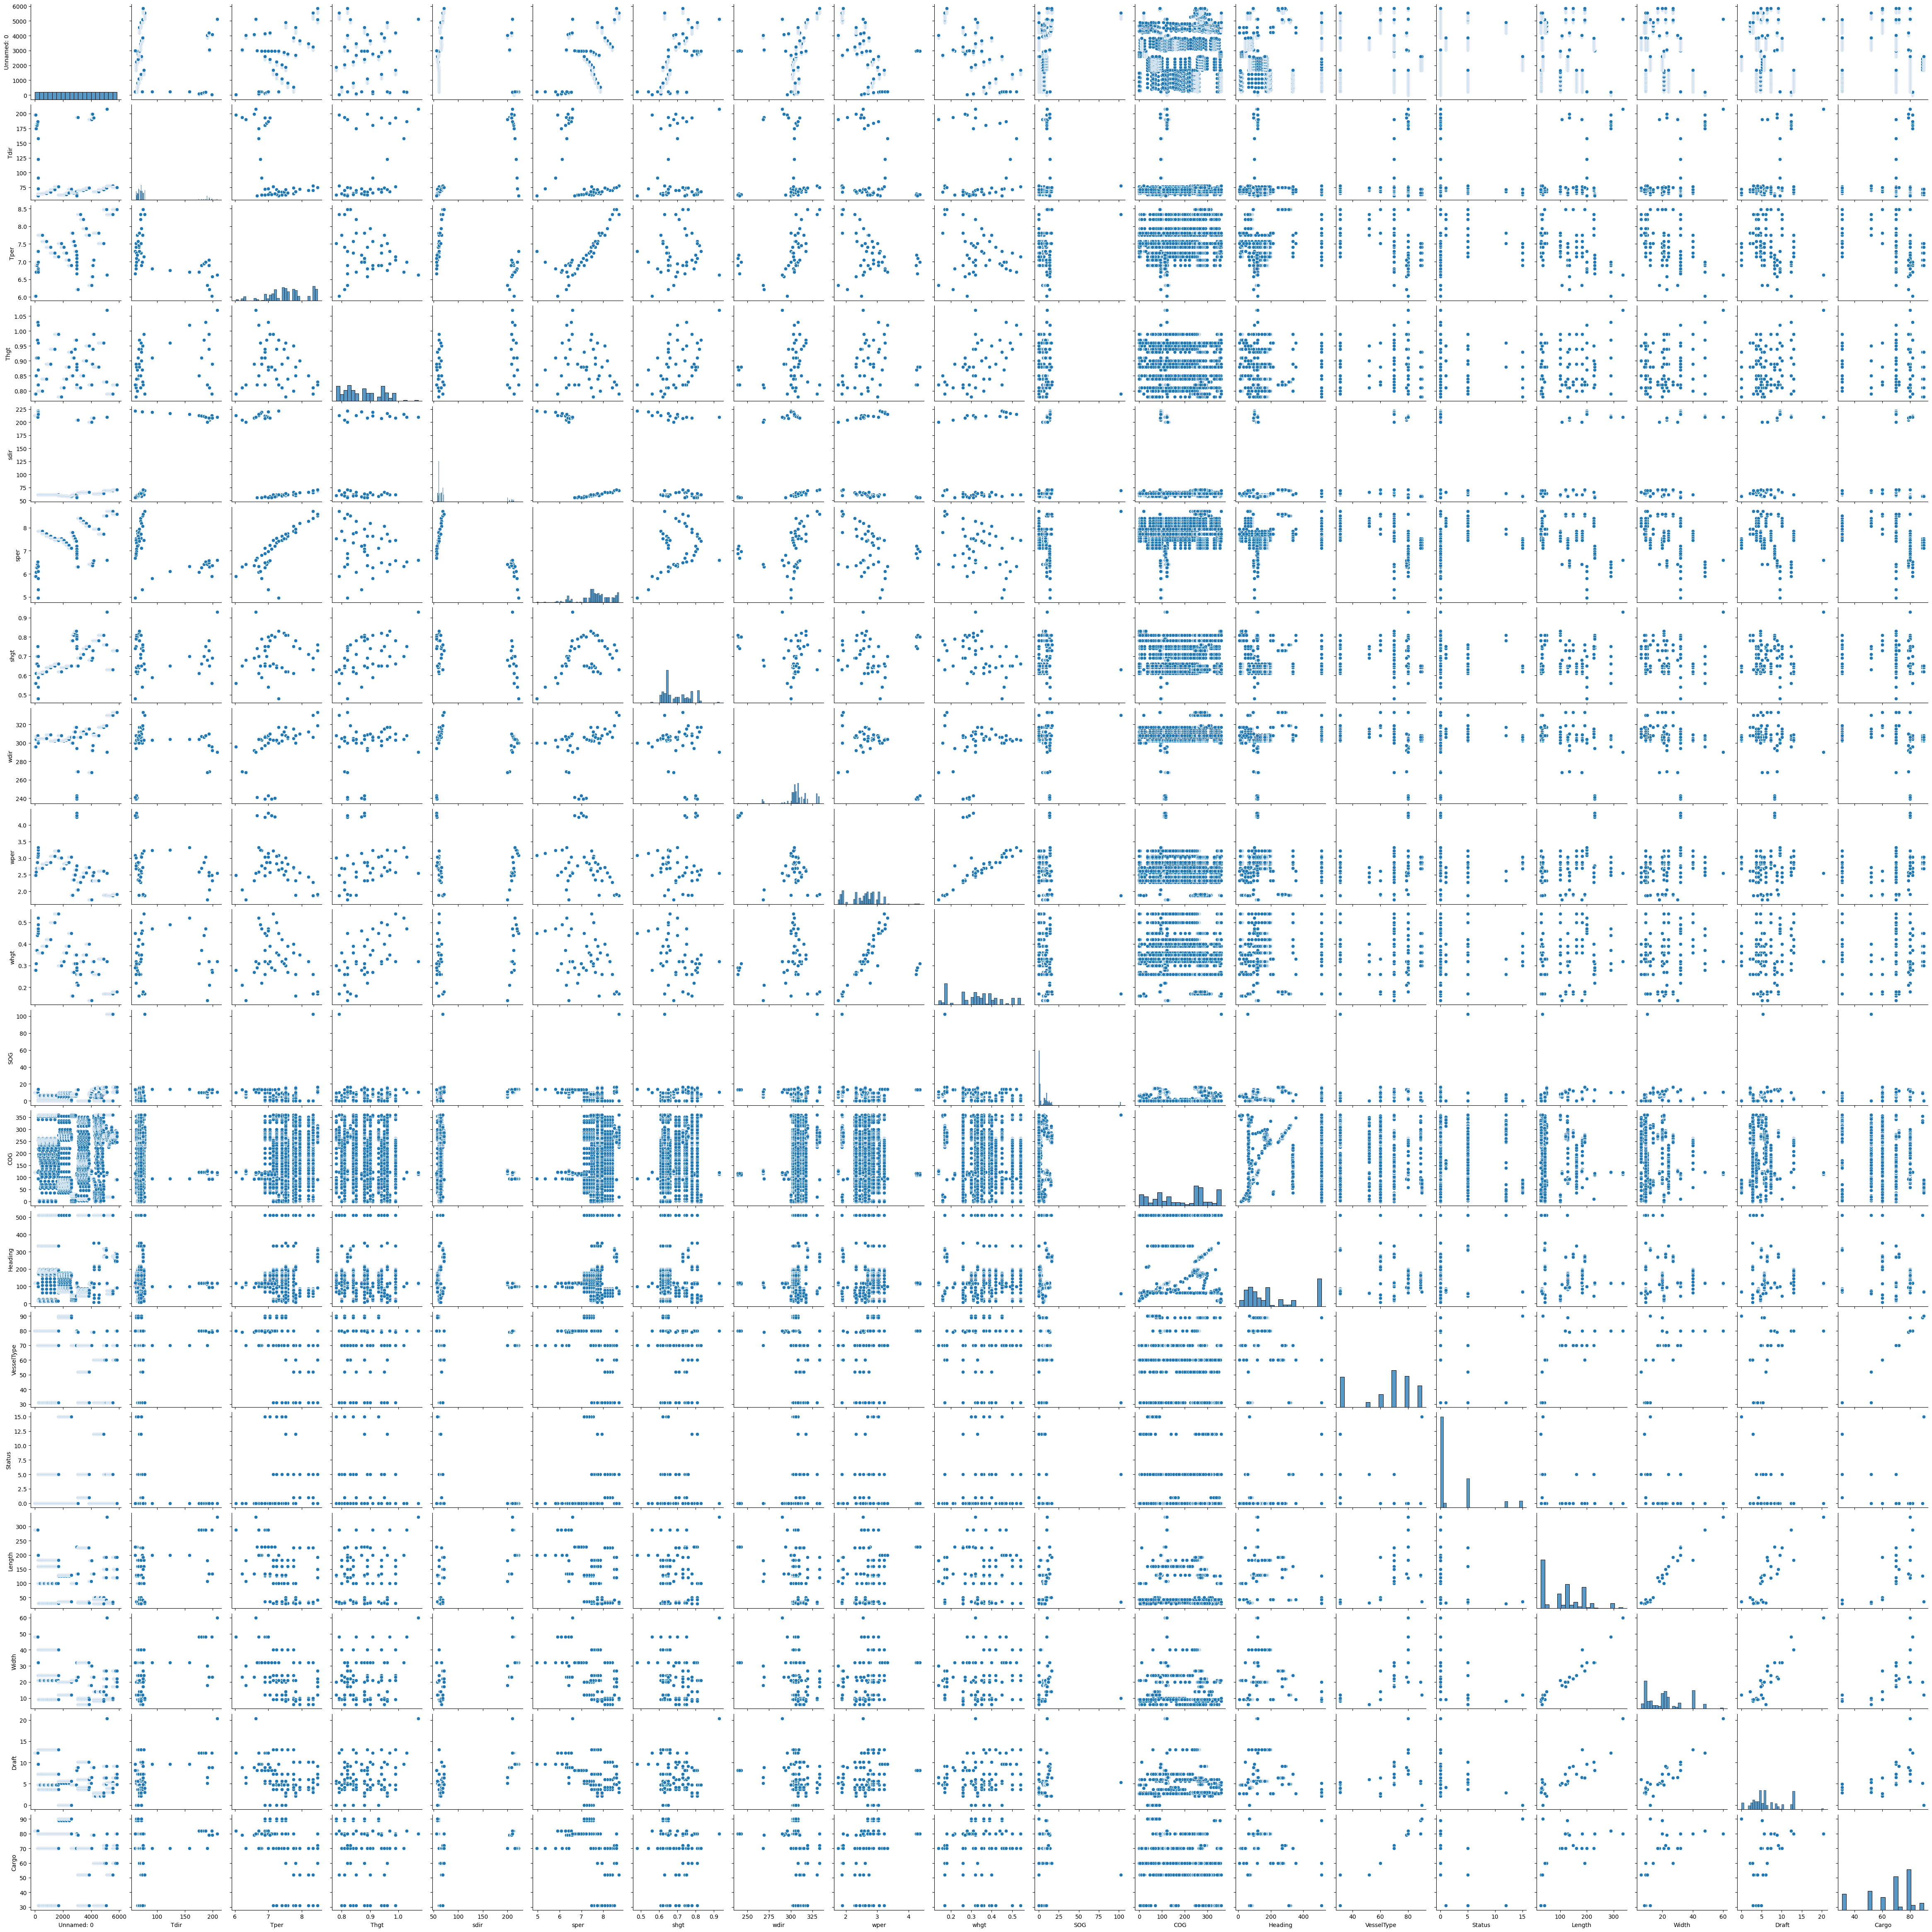

In [6]:
sns.pairplot(x)

Text(0.5, 1.0, 'Correlation')

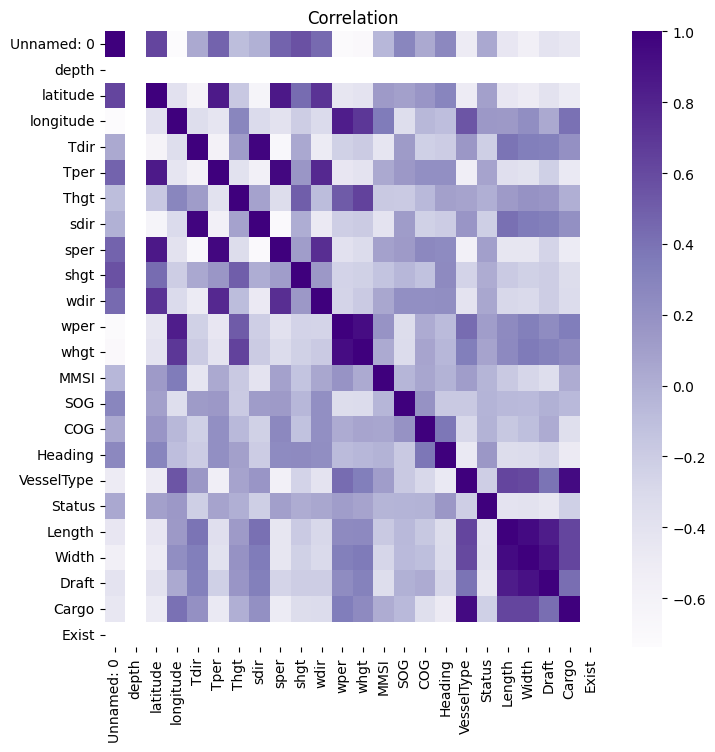

In [7]:
# using heatmap to find correlation
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(df.corr(method ='pearson'), cmap="Purples")
heatmap.set_title("Correlation")